## Подготовка данных

### Открытие файлов и их изучение

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as sklm
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Прочитаем и откроем файлы:

In [2]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except ValueError:
    print('Ошибка')

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Проверка эффективности обогащения

Определим, какие столбцы в датасетах соответствуют эффективности обогащения:

In [6]:
for value in df_train.columns:
    if 'recovery' in value:
        print(value)
        
print('-------------------------')
        
for value in df_test.columns:
    if 'recovery' in value:
        print(value)
        
print('-------------------------')
        
for value in df_full.columns:
    if 'recovery' in value:
        print(value)

final.output.recovery
rougher.output.recovery
-------------------------
-------------------------
final.output.recovery
rougher.output.recovery


Из результата следует, что за эффективность отвечают 2 столбца в обучающей выборке (4 с учетом полной). Проверим верность расчетов на основе столбца `rougher.output.recovery`. Для этого создадим функцию `recov`, вычисляющую эффективность обогащения, которая будет на вход получать 3 значения (`part_gold_concentrate` - доля золота в концентрате после флотации/очистки, `part_gold_raw_material` - доля золота в сырье/концентрате до флотации/очистки, `part_gold_tail` - доля золота в отвальных хвостах после флотации/очистки):

In [7]:
def recov(part_gold_concentrate, part_gold_raw_material, part_gold_tail):
    recovery_list = []
    for index in range(len(part_gold_concentrate)):
        recovery_list.append(part_gold_concentrate[index] * (part_gold_raw_material[index] - part_gold_tail[index]) * 100 / 
                             (part_gold_raw_material[index] * (part_gold_concentrate[index] - part_gold_tail[index])))
    recovery_pd = pd.Series(recovery_list)                 
    return recovery_pd

Определим столбцы в обучающей выборке, отвечающие 3 парамерам в функции `recov`. Для этого выведем столбцы выборки:

In [8]:
df_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Таким образом, можно определить, что за параметр `part_gold_concentrate` отвечает столбец `rougher.output.concentrate_au`, за `part_gold_raw_material` - `rougher.input.feed_au`, за `part_gold_tail` - `rougher.output.tail_au`. Определим эффективность обогащения по формуле `recov`:

In [9]:
recovery_check_df_train = recov(part_gold_concentrate = df_train['rougher.output.concentrate_au'], 
                                part_gold_raw_material = df_train['rougher.input.feed_au'], 
                                part_gold_tail = df_train['rougher.output.tail_au'])

recovery_check_df_train.head(10)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
dtype: float64

Определим MAE между полученными расчётами и значением признака:

In [10]:
sklm.mean_absolute_error(df_train['rougher.output.recovery'], recovery_check_df_train)

1.1131451184435918e-14

Таким образом, среднеквадратичная ошибка ничтожно мала. Делаем вывод о том, что эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке

Определим столбцы, отсутствующие в тестовой выборке и проанализируем их:

In [11]:
columns_not_in_df_test = []

for value in df_train.columns:
    if value not in df_test.columns:
        columns_not_in_df_test.append(value)
        
df_train[columns_not_in_df_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


Можно заметить, что все признаки имею тип `float`, и практически все характеризуют параметры продукта в конце на различных стадиях очистки, т.е. конечное его состояние после каждого этапа. Однако в тестовой выборке не пропущены столбцы, характеризующие состояние процесса, т.е. определяющие, какое количество золота останется в продукте при завершении этапа. Это означает, что для нашей модели отсутствие пропущенных столбцов в тестовой выборке не сильно повлияет на создание модели, так как основной задачей является именно получение предсказания, какая часть золота останется после полной очистки руды.

### Проведем предобрабоку данных

Сделаем проверку датасетов на дубликаты:

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

In [14]:
df_full.duplicated().sum()

0

Дубликаты отсутствуют.

Сделаем проверку датасетов на правильный тип данных и на пропуски:

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [17]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Тип данных во всех стобцах верный, однако есть пропуски, исследуем их.

На обучающей выборке определим отношение максимального количества пропусков к общему количеству значений в столбце:

In [18]:
list_pass = []
for value in pd.Series(df_train.columns):
    if df_train[value].isna().sum() > 0:
        list_pass.append(df_train[value].isna().sum())
print(max(list_pass) / len(df_train) * 100, '%')

11.343557848611209 %


В одном из столбцов обучающей выборки доля пропусков более 10% от общего количества значений в столбце - нельзя удалить строки с пропусками. Необходимо придумать, каким методом необходимо заполнить пропуски, чтобы значения были максимально правдивыми. 

Можем заметить, что в данном тех процессе есть привязка значений в датасетах к дате и времени. Т.е. каждое последующее значение в столбцах будет похожим на предыдущее или последующее. Таким образом, попробуем заполнить пропуски на последующее значение в каждом столбце (то же самое проделаем и в тестовой и полной выборке):

In [19]:
df_train.fillna(method = 'ffill', inplace = True)
df_test.fillna(method = 'ffill', inplace = True)
df_full.fillna(method = 'ffill', inplace = True)

Проверим, заполнились ли пропуски:

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [22]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


Пропуски устранены. Можем переходить к следующему этапу.

## Анализ данных

### Оценка изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Проследим за изменением концентрации Au, Ag и Pb на различных этапах очистки. 

Создадим функцию, визуализирующую изменение. Так как данных довольно много, они будут накладываться друг на друга. Поэтому поэтому усредним график: примем определенный шаг `step`. В этом интервале значений будем брать только среднее. Далее график строится уже по этим точкам:

In [23]:
def concentrate_plot_df_train(column, step = 10, color = 'blue', label = 'No'):
    concentrate_plot_list = []
    for index in range(0, len(df_train[column]), step):
        concentrate_step = df_train[column][index : index + step].mean()
        concentrate_plot_list.append(concentrate_step)
    return plt.plot(concentrate_plot_list, color = color, label = label)


Проследим, как будем меняться концентрация Au на различных этапах очистки:

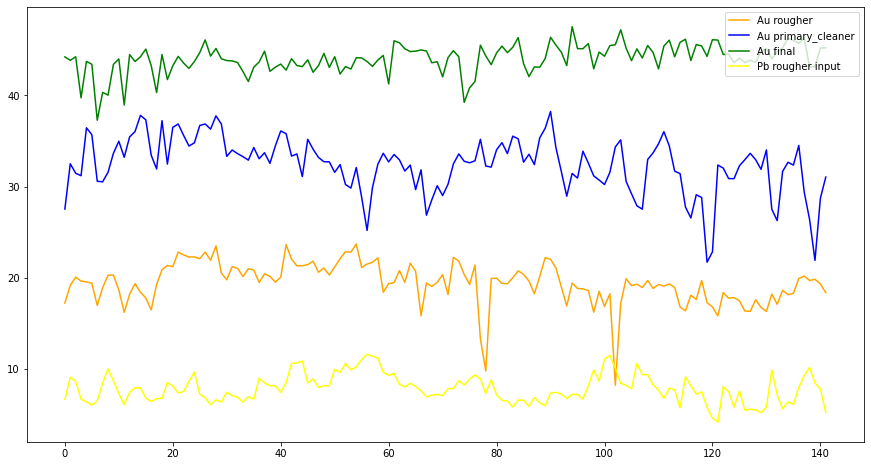

In [24]:
plt.figure(figsize = (15, 8))
concentrate_plot_df_train('rougher.output.concentrate_au', step = 100, color = 'orange', label = 'Au rougher');
concentrate_plot_df_train('primary_cleaner.output.concentrate_au', step = 100, color = 'blue', label = 'Au primary_cleaner');
concentrate_plot_df_train('final.output.concentrate_au', step = 100, color = 'green', label = 'Au final');
concentrate_plot_df_train('rougher.input.feed_au', step = 100, color = 'yellow', label = 'Pb rougher input');
plt.legend(loc = 'upper right');

Проследим, как будем меняться концентрация Ag на различных этапах очистки:

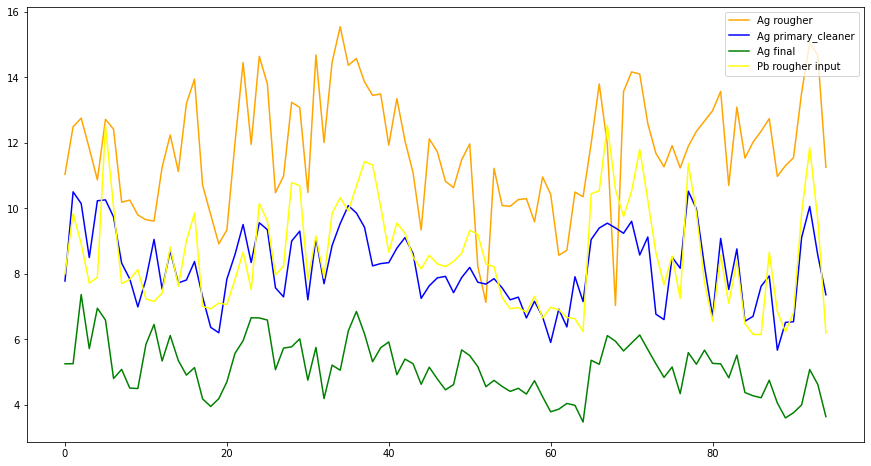

In [25]:
plt.figure(figsize = (15, 8))
concentrate_plot_df_train('rougher.output.concentrate_ag', step = 150, color = 'orange', label = 'Ag rougher');
concentrate_plot_df_train('primary_cleaner.output.concentrate_ag', step = 150, color = 'blue', label = 'Ag primary_cleaner');
concentrate_plot_df_train('final.output.concentrate_ag', step = 150, color = 'green', label = 'Ag final');
concentrate_plot_df_train('rougher.input.feed_ag', step = 150, color = 'yellow', label = 'Pb rougher input');
plt.legend(loc = 'upper right');

Проследим, как будем меняться концентрация Pb на различных этапах очистки:

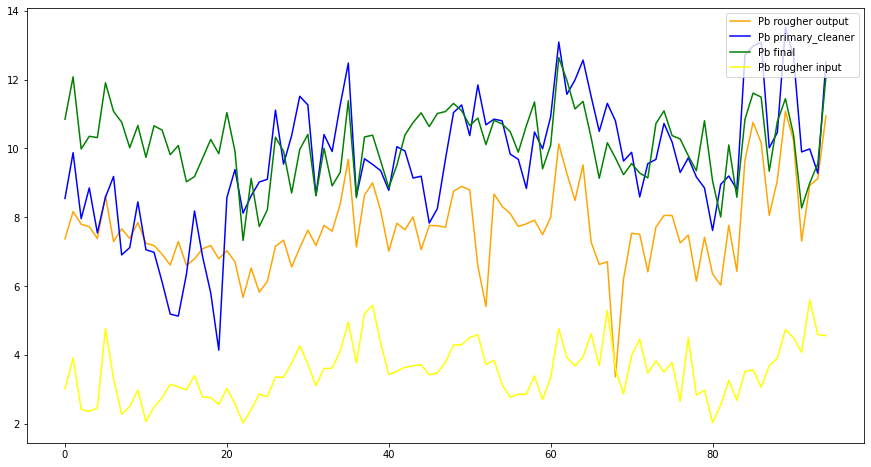

In [26]:
plt.figure(figsize = (15, 8))
concentrate_plot_df_train('rougher.output.concentrate_pb', step = 150, color = 'orange', label = 'Pb rougher output');
concentrate_plot_df_train('primary_cleaner.output.concentrate_pb', step = 150, color = 'blue', label = 'Pb primary_cleaner');
concentrate_plot_df_train('final.output.concentrate_pb', step = 150, color = 'green', label = 'Pb final');
concentrate_plot_df_train('rougher.input.feed_pb', step = 150, color = 'yellow', label = 'Pb rougher input');
plt.legend(loc = 'upper right');

Из полученных результатов следует, что:
1. Концентрация Au значительно повысилась (примерно 7% при начальной концентрации, примерно 20% после флотации, примерно 32% после первичного этапа очистки и примерно 44% после вторичного этапа очистки)
2. Концентрация Ag значительно снизилась (примерно 9% при начальной концентрации, примерно 12% после флотации, примерно 8% после первичного этапа очистки и примерно 5% после вторичного этапа очистки)
3. Концентрация Pb повысилась не очень значительно (примерно 3.5% при начальной концентрации, примерно 7% после флотации, примерно 9% после первичного этапа очистки и примерно 10% после вторичного этапа очистки)

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Определим среднеквадратичную ошибку между гранулами сырья в обучающей и тестовой выборках. Так как значений в обучающей выборке значительно больше, выберем случайным образом 5290 значений из обучающей, и сравним выборки:

In [27]:
df_train_sample = df_train['primary_cleaner.input.feed_size'].sample(5290, random_state = 12345)
rmse_primary = sklm.mean_squared_error(df_train_sample, df_test['primary_cleaner.input.feed_size']) ** 0.5
print('Среднеквадратичная ошибка размеров гранул сырья:', rmse_primary)

Среднеквадратичная ошибка размеров гранул сырья: 0.8532095406015818


Среднеквадратичная ошибка незначительная, проводить моделирование на данной тестовой выборке можно.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Определим суммарную концентрацию веществ на стадии сырья:

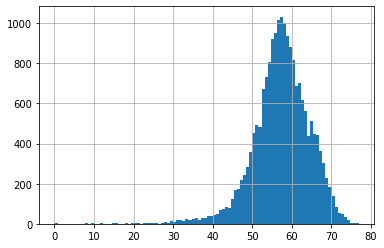

In [28]:
df_full_sum_rougher_input = df_full[['rougher.input.feed_ag', 
                               'rougher.input.feed_pb', 
                               'rougher.input.feed_sol', 
                               'rougher.input.feed_au']].sum(axis = 1)

df_full_sum_rougher_input.hist(bins = 100);

Определим суммарную концентрацию веществ на стадии чернового концентрата:

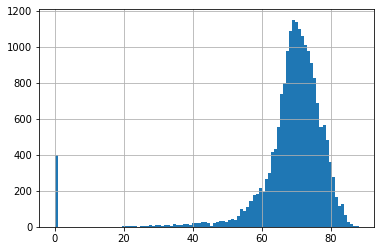

In [29]:
df_full_sum_rougher_output = df_full[['rougher.output.concentrate_ag', 
                               'rougher.output.concentrate_pb', 
                               'rougher.output.concentrate_sol', 
                               'rougher.output.concentrate_au']].sum(axis = 1)

df_full_sum_rougher_output.hist(bins = 100);

Определим суммарную концентрацию веществ на стадии финального концентрата:

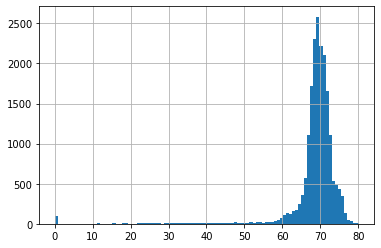

In [30]:
df_full_sum_final_output = df_full[['final.output.concentrate_ag', 
                             'final.output.concentrate_pb', 
                             'final.output.concentrate_sol', 
                             'final.output.concentrate_au']].sum(axis = 1)

df_full_sum_final_output.hist(bins = 100);

Из полученных результатов следует, что распределение суммарной концентрации нормальное. Однако возникает аномально большое количество веществ с нулевой концентрацией. Удалим строки с этими значениями, так как в процессе они могут повлиять на обучение модели.

In [31]:
df_full = df_full[df_full_sum_rougher_input != 0].dropna()
df_full = df_full[df_full_sum_rougher_output != 0].dropna()
df_full = df_full[df_full_sum_final_output != 0].dropna()
df_full = df_full.reset_index(drop = True)

/tmp/ipykernel_432/1507458676.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full = df_full[df_full_sum_final_output != 0].dropna()


Однако такие аномалии могут встречаться и в обучающей выборке. Это также критично, так как обучение модели будет производиться именно на train. Проведем данную операцию и для train:

In [32]:
df_train_sum_rougher_input = df_train[['rougher.input.feed_ag', 
                               'rougher.input.feed_pb', 
                               'rougher.input.feed_sol', 
                               'rougher.input.feed_au']].sum(axis = 1)

df_train_sum_rougher_output = df_train[['rougher.output.concentrate_ag', 
                               'rougher.output.concentrate_pb', 
                               'rougher.output.concentrate_sol', 
                               'rougher.output.concentrate_au']].sum(axis = 1)

df_train_sum_final_output = df_train[['final.output.concentrate_ag', 
                             'final.output.concentrate_pb', 
                             'final.output.concentrate_sol', 
                             'final.output.concentrate_au']].sum(axis = 1)

df_train = df_train[df_train_sum_rougher_input != 0].dropna()
df_train = df_train[df_train_sum_rougher_output != 0].dropna()
df_train = df_train[df_train_sum_final_output != 0].dropna()
df_train = df_train.reset_index(drop = True)

/tmp/ipykernel_432/4033204760.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train = df_train[df_train_sum_final_output != 0].dropna()


## Модель

### Функция для вычисления метрики sMAPE

Создадим функцию для вычисления метрики sMAPE. На вход будут получены 2 значения: целевой признак эффективности обогащения концентрата и  результат предсказаний эффективности обогащения концентрата. На выходе получаем метрику sMAPE:

In [33]:
def smape_function(target, pred):
    
    target = target.tolist()
    pred = pred.tolist()
    smape_part = []
    
    for index in range(len(target)):
        smape_part.append(abs(target[index] - pred[index]) * 2 / (abs(target[index]) + abs(pred[index])))

    return 100 * pd.Series(smape_part).sum() / len(smape_part)

Создадим метрику scorer из функции smape_function:

In [34]:
scorer = sklm.make_scorer(smape_function)

### Обучение моделей и оценка их качества кросс-валидацией

Выделим из выгрузки целевые признаки:

In [35]:
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']

Выделим из выгрузки признаки (которые также есть в тестовой выборке). Значения столбца с датой и временем для обучения не требуются:

In [36]:
features_train_rougher = df_train.drop(columns_not_in_df_test, axis = 1)
features_train_rougher = features_train_rougher.drop(['date'], axis = 1)
features_train_final = df_train.drop(columns_not_in_df_test, axis = 1)
features_train_final = features_train_final.drop(['date'], axis = 1)

Разделим обучающие признаки на обучающую и валидационную выборки:

In [37]:
(features_rougher_train, features_rougher_valid, 
 target_rougher_train, target_rougher_valid) = train_test_split(features_train_rougher, target_train_rougher, 
                                                                test_size = 0.25, random_state = 12345)

(features_final_train, features_final_valid, 
 target_final_train, target_final_valid) = train_test_split(features_train_final, target_train_final, 
                                                                test_size = 0.25, random_state = 12345)

#### Модель LR

Используем модель LR для чернового концентрата:

In [38]:
model_rougher_LR = LinearRegression()
model_rougher_LR = model_rougher_LR.fit(features_rougher_train, target_rougher_train)
predictions_rougher_LR = model_rougher_LR.predict(features_rougher_valid)

Проверим на кросс-валидации модель чернового концентрата:

In [39]:
scores_rougher_LR = cross_val_score(model_rougher_LR, features_rougher_train, target_rougher_train, scoring = scorer, cv = 10)
scores_rougher_LR = scores_rougher_LR.sum() / len(scores_rougher_LR)
scores_rougher_LR

4.665154417461985

Используем модель LR для финального концентрата:

In [40]:
model_final_LR = LinearRegression()
model_final_LR = model_final_LR.fit(features_final_train, target_final_train)
predictions_final_LR = model_final_LR.predict(features_final_valid)

Проверим на кросс-валидации модель финального концентрата:

In [41]:
scores_final_LR = cross_val_score(model_rougher_LR, features_final_train, target_final_train, scoring = scorer, cv = 10)
scores_final_LR = scores_final_LR.sum() / len(scores_final_LR)
scores_final_LR

8.176566292438642

Итоговое значение sMAPE:

In [42]:
sMAPE_LR = 0.25 * scores_rougher_LR + 0.75 * scores_final_LR
print('sMAPE:', sMAPE_LR)

sMAPE: 7.298713323694477


#### Модель DR

Для оценки качества модели сравним ее с моделью DummyRegressor:

In [43]:
model_rougher_DR = DummyRegressor(strategy = 'mean')
model_rougher_DR = model_rougher_DR.fit(features_rougher_train, target_rougher_train)
predictions_rougher_DR = model_rougher_DR.predict(features_rougher_valid)

model_final_DR = DummyRegressor(strategy = 'mean')
model_final_DR = model_final_DR.fit(features_final_train, target_final_train)
predictions_final_DR = model_final_DR.predict(features_final_valid)

scores_rougher_DR = cross_val_score(model_rougher_DR, features_rougher_train, target_rougher_train, 
                                            scoring = scorer, cv = 10)
scores_rougher_DR_mean = scores_rougher_DR.sum() / len(scores_rougher_DR)

scores_final_DR = cross_val_score(model_final_DR, features_rougher_train, target_rougher_train, 
                                            scoring = scorer, cv = 10)
scores_final_DR_mean = scores_final_DR.sum() / len(scores_final_DR)

sMAPE_DR = 0.25 * scores_rougher_DR_mean + 0.75 * scores_final_DR_mean
print('sMAPE:', sMAPE_DR)

sMAPE: 7.306596202455767


Качество модели LR (7.2987) лучше, чем DR (7.3066), однако незначительно. Поэтому сделаем проверку на еще одной модели - RF.

#### Модель RF

Используем тот же алгоритм, что и в LR, но уже в модели RF.

Используем модель RF для чернового и финального концентратов, создадим список, содержащий значения итоговой sMAPE метрики, а также 2 гиперпараметров, при которых достигнуто это значение:

In [44]:
%%time

sMAPE_iter = []

for est in range(1, 8):
    for depth in range(1, 8):
        
        model_rougher_RF = RandomForestRegressor(random_state = 12345, max_depth = depth, n_estimators = est)
        model_rougher_RF = model_rougher_RF.fit(features_rougher_train, target_rougher_train)
        predictions_rougher_RF = model_rougher_RF.predict(features_rougher_valid)
        
        scores_rougher_RF = cross_val_score(model_rougher_RF, features_rougher_train, target_rougher_train, 
                                            scoring = scorer, cv = 5)
        scores_rougher_RF_mean = scores_rougher_RF.sum() / len(scores_rougher_RF)
        
        model_final_RF = RandomForestRegressor(random_state = 12345, max_depth = depth, n_estimators = est)
        model_final_RF = model_final_RF.fit(features_final_train, target_final_train)
        predictions_final_RF = model_final_RF.predict(features_final_valid)
        
        scores_final_RF = cross_val_score(model_rougher_RF, features_final_train, target_final_train, 
                                          scoring = scorer, cv = 5)
        scores_final_RF_mean = scores_final_RF.sum() / len(scores_final_RF)
        
        sMAPE_iter.append([0.25 * scores_rougher_RF_mean + 0.75 * scores_final_RF_mean, depth, est])

CPU times: user 3min 53s, sys: 443 ms, total: 3min 54s
Wall time: 3min 54s


Определим лучшее значение итоговой sMAPE, а также гиперпараметров, при которых достигнуто это значение:

In [45]:
best_sMAPE = 100
best_max_depth = 0
best_n_estimators = 0

for index in range(len(sMAPE_iter)):
    if best_sMAPE > sMAPE_iter[index][0]:
        best_sMAPE = sMAPE_iter[index][0]
        best_max_depth = sMAPE_iter[index][1]
        best_n_estimators = sMAPE_iter[index][2]
        
print('Лучшее значение итоговой sMAPE:', best_sMAPE)
print('Значение гиперпараметра depth:', best_max_depth)
print('Значение гиперпараметра n_estimators:', best_n_estimators)

Лучшее значение итоговой sMAPE: 6.39279185917873
Значение гиперпараметра depth: 7
Значение гиперпараметра n_estimators: 7


Таким образом, лучшей моделью примем RF с гиперпараметрами `depth = 7` и `n_estimators = 7`, `sMAPE` модели `6.3945`.

### Проверка лучшей модели на тестовой выборке

Проверим лучшую модель - RF - на тестовой выборке.

Проведем масштабирование признаков тестовой выборки:

In [46]:
features_test_rougher = df_test.drop(['date'], axis = 1)
features_test_final = df_test.drop(['date'], axis = 1)

Определим целевые признаки из полного датасета:

In [47]:
target_test = pd.merge(df_full, df_test['date'], how = 'right')
target_test_rougher = target_test['rougher.output.recovery'].reset_index(drop = True)
target_test_final = target_test['final.output.recovery'].reset_index(drop = True)

Обучим модели RF и создадим предсказания по тестовой выборке:

In [48]:
model_rougher_best_RF = RandomForestRegressor(random_state = 12345, max_depth = 4, n_estimators = 30)
model_rougher_best_RF = model_rougher_best_RF.fit(pd.DataFrame(features_rougher_train), pd.Series(target_rougher_train))
predictions_rougher_best_RF = pd.Series(model_rougher_best_RF.predict(pd.DataFrame(features_test_rougher)))

model_final_best_RF = RandomForestRegressor(random_state = 12345, max_depth = 4, n_estimators = 30)
model_final_best_RF = model_final_best_RF.fit(pd.DataFrame(features_final_train), pd.Series(target_final_train))
predictions_final_best_RF = pd.Series(model_final_best_RF.predict(pd.DataFrame(features_test_final)))

Определим smape между целевыми признаками и предсказаниями:

In [49]:
smape_rougher_best = smape_function(target_test_rougher, predictions_rougher_best_RF)
smape_final_best = smape_function(target_test_final, predictions_final_best_RF)
sMAPE_best = 0.25 * smape_rougher_best + 0.75 * smape_final_best
print('sMAPE:', sMAPE_best)

sMAPE: 7.1152837528209645


In [50]:
model_rougher_dumn = DummyRegressor(strategy = 'mean')
model_rougher_dumn = model_rougher_best_RF.fit(pd.DataFrame(features_rougher_train), pd.Series(target_rougher_train))
predictions_rougher_dumn = pd.Series(model_rougher_dumn.predict(pd.DataFrame(features_test_rougher)))

model_final_dumn = DummyRegressor(strategy = 'mean')
model_final_dumn = model_final_dumn.fit(pd.DataFrame(features_final_train), pd.Series(target_final_train))
predictions_final_dumn = pd.Series(model_final_dumn.predict(pd.DataFrame(features_test_final)))

In [51]:
smape_rougher_best = smape_function(target_test_rougher, predictions_rougher_dumn)
smape_final_best = smape_function(target_test_final, predictions_final_dumn)
sMAPE_best = 0.25 * smape_rougher_best + 0.75 * smape_final_best
print('sMAPE:', sMAPE_best)

sMAPE: 7.4495720539897645


## Выводы

В ходе выполнения работы были проведены: подготовка данных, их анализ, была создана модель.

Во время подготовки данных была произведена проверка верности расчетов на эффективность обогащения. Также проведена проверка на дубликаты, верный тип данных, были устранены пропуски.

Во время анализа данных были произведены:
1. Оценка изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки: концентрация Au значительно повысилась (примерно с 7% до 44%), концентрация Ag незначительно снизилась (примерно с 9% до 5%), концентрация Pb повысилась не очень значительно (примерно с 3.5% до 10%).
2. Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках: среднеквадратичная ошибка незначительная (0.8532), проводить моделирование на данной тестовой выборке можно.
3. Исследование суммарной концентрации всех веществ на разных стадиях (в сырье, в черновом и финальном концентратах): построены гистограммы, были устранены аномальные значения.

Во время создания модели были:
1. Создана функция для вычисления метрики sMAPE, а также на ее основе метрика scorer.
2.  Произведено обучение моделей (LR, DR и RF) и оценка их качества кросс-валидацией: лучшей моделью была получена модель RF с итоговой метрикой sMAPE 6.3945, по сравнению с LR (sMAPE - 7.2987) и DR (sMAPE - 7.3066).
3. Проверена лучшая модель (RF) на тестовой выборке: итоговая sMAPE составила 7.1153.